In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [92]:
#Reading Data
data=pd.read_csv("Train.csv")

# Data Understanding

In [93]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [94]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [96]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [97]:
data.shape

(8523, 12)

In [98]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# Exploratory Data Analysis

## Univariate

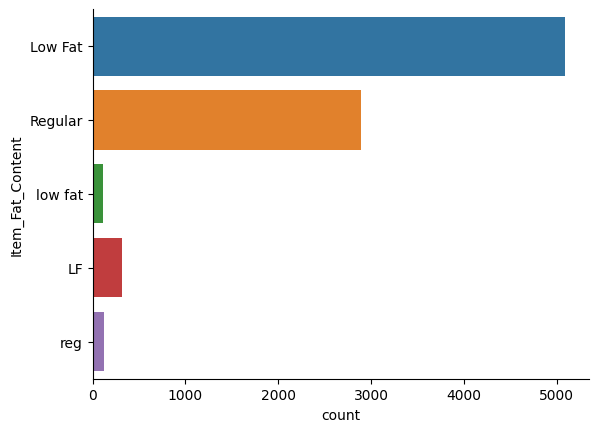

In [99]:
sns.countplot(y = 'Item_Fat_Content', data = data)
sns.despine()

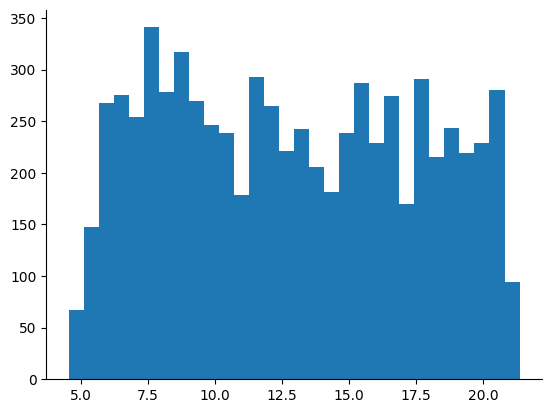

In [100]:
plt.hist(x = 'Item_Weight',data = data,bins = 30)
plt.rc("axes.spines", top=False, right=False)

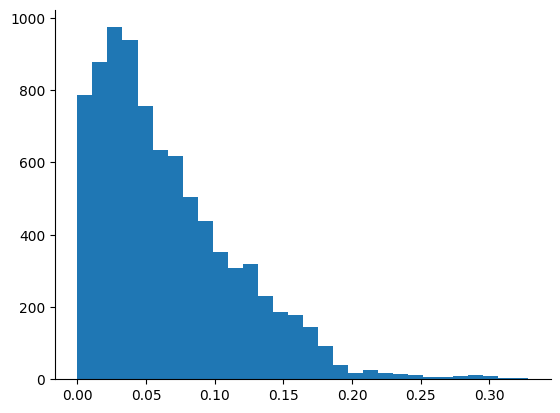

In [101]:
plt.hist(x = 'Item_Visibility',data = data,bins = 30)
plt.rc("axes.spines", top=False, right=False)

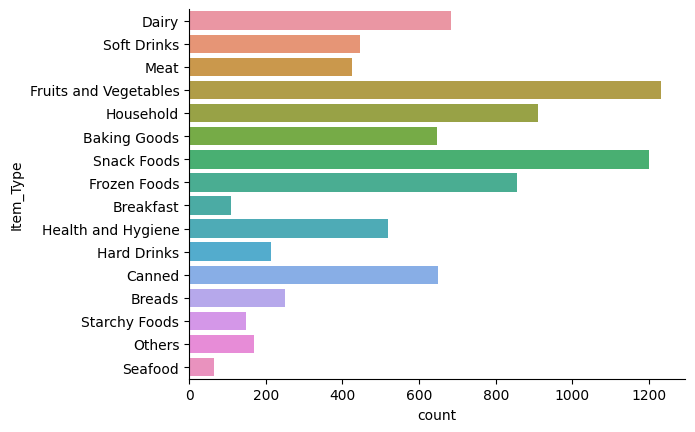

In [102]:
sns.countplot(y = 'Item_Type', data = data)
sns.despine()

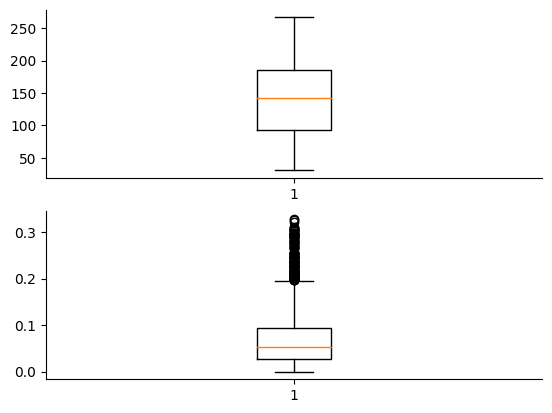

In [103]:
fig, ax = plt.subplots(2, 1)

ax[0].boxplot(data["Item_MRP"])
ax[1].boxplot(data["Item_Visibility"])

plt.show()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Name: Item_Type, dtype: int64

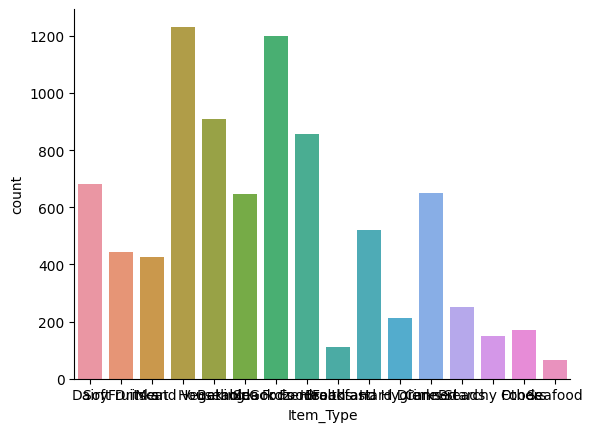

In [104]:
sns.countplot(data=data,x="Item_Type")
data.Item_Type.value_counts(ascending=False).head()

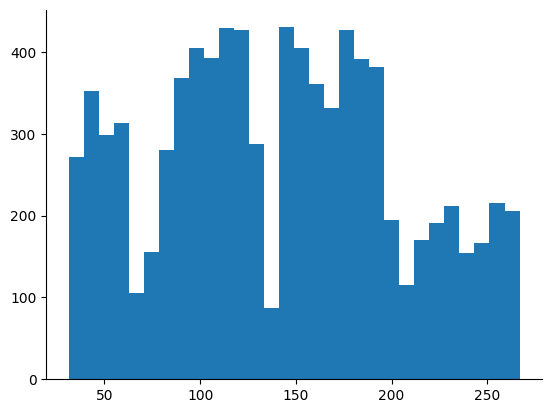

In [105]:
plt.hist(x = 'Item_MRP',data = data,bins = 30)
plt.rc("axes.spines", top=False, right=False)

<AxesSubplot: xlabel='Outlet_Location_Type', ylabel='count'>

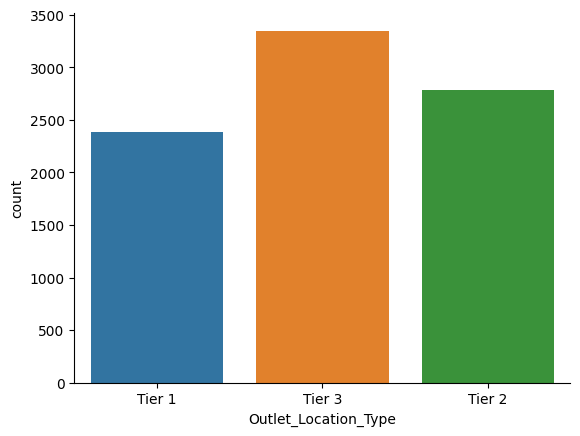

In [106]:
sns.countplot(data=data,x="Outlet_Location_Type")

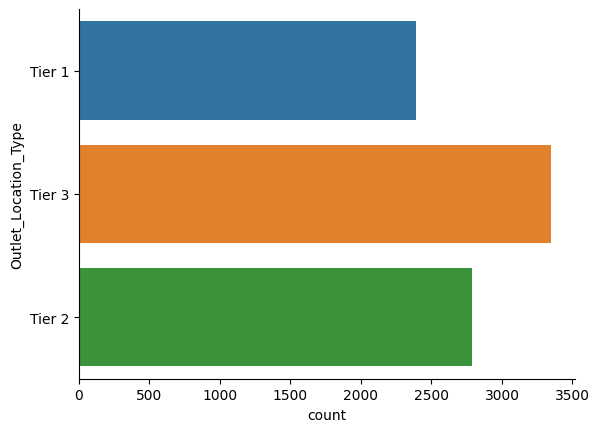

In [107]:
sns.countplot(y = 'Outlet_Location_Type', data = data)
sns.despine()

<AxesSubplot: xlabel='Item_MRP', ylabel='Count'>

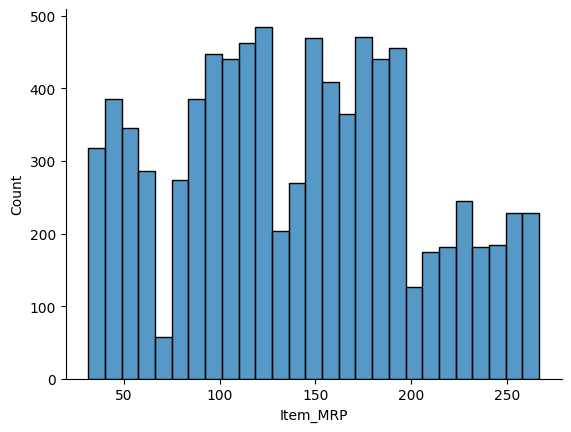

In [108]:
sns.histplot(data,x="Item_MRP")

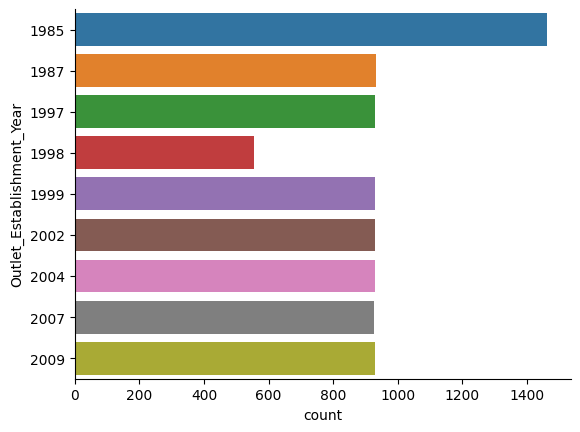

In [109]:
sns.countplot(y = 'Outlet_Establishment_Year', data = data)
sns.despine()

## Bi Variate Analysis

/var/folders/8k/z1tq5d7j63n27w5shfpcsrr40000gn/T/ipykernel_741/2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<AxesSubplot: >

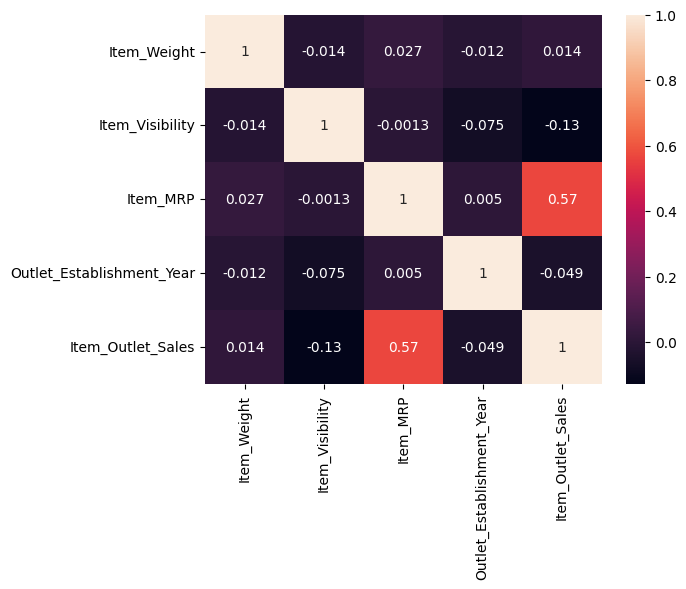

In [110]:
sns.heatmap(data.corr(),annot=True)

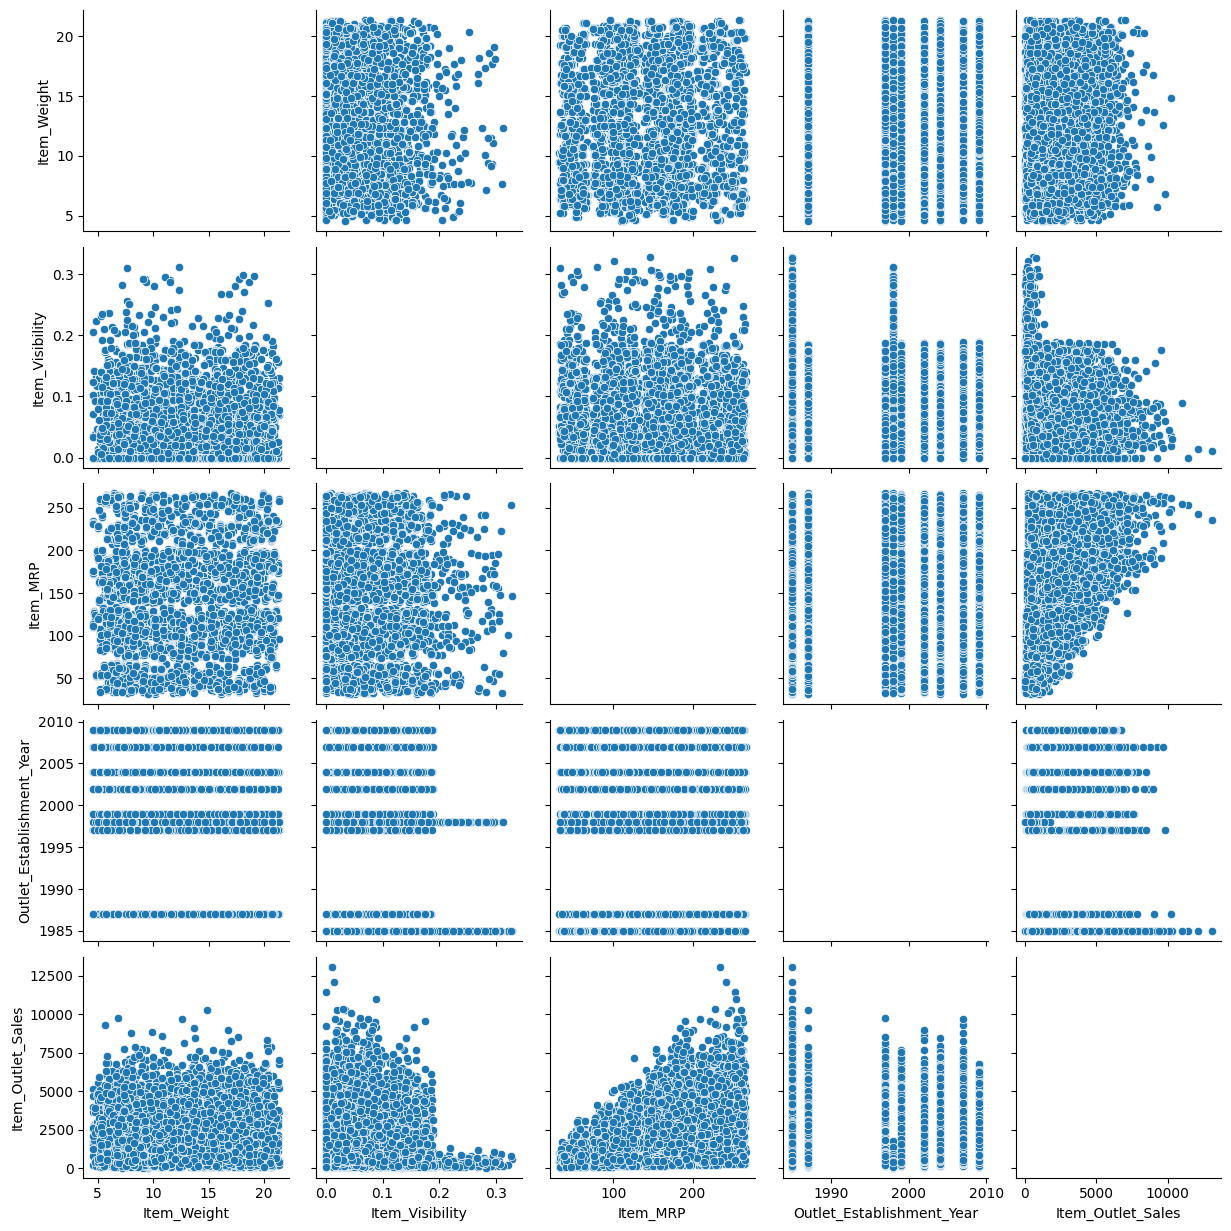

In [111]:
sns.pairplot(data,diag_kind="lower")

# Missing values treatment


In [112]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [113]:
data.shape

(8523, 12)

In [114]:
#No duplicates
data.duplicated().sum()

# As Item_Weight is a continous attribute, 
# we can replace the missing values with mean
data["Item_Weight"] = data["Item_Weight"].fillna(data["Item_Weight"].mean())
data["Item_Weight"].isnull().sum()
# Outlet_Size is a categorical attribute,
# replacing the null values with missing value
data["Outlet_Size"] = data["Outlet_Size"].fillna(str(data["Outlet_Size"].mode()))
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [115]:
data.Outlet_Size.value_counts()

Medium                                           2793
0    Medium\nName: Outlet_Size, dtype: object    2410
Small                                            2388
High                                              932
Name: Outlet_Size, dtype: int64

# Feature Engineering

In [116]:
def rename(x):
    if x == 'Medium':
        return 'm'
    elif x == "Small":
        return 's'
    else:
        return 'h'

data.Outlet_Size=data.Outlet_Size.apply(rename)
data.Outlet_Size.value_counts()

h    3342
m    2793
s    2388
Name: Outlet_Size, dtype: int64

In [117]:
data["Item_Fat_Content"].value_counts()
# Here LF satnds for Low Fat and reg stands for Regular

# Replacing LF with Low Fat, reg Regular, low fat with Low Fat
data["Item_Fat_Content"] = data["Item_Fat_Content"].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
data["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# Encoding Categorical Variables

In [118]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False,handle_unknown='ignore')
data.Outlet_Type.nunique()
data.columns.to_list()
cat_cols=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
encoder.fit(data[cat_cols])
data
encoded_cols = list(encoder.get_feature_names_out())
encoded_cols
data[encoded_cols] = encoder.transform(data[cat_cols])

/Users/apple/Desktop/Data analyst/proj/Technolabs/venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [119]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       

In [120]:
data[encoded_cols] = encoder.transform(data[cat_cols])

# Model Building

In [121]:
# Importing Required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor

In [122]:
input_cols=['Item_Weight','Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year','Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049', 'Outlet_Size_h',
       'Outlet_Size_m', 'Outlet_Size_s', 'Outlet_Location_Type_Tier 1',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3']

In [123]:
train_inputs,test_inputs,train_targets,test_targets = train_test_split(data[input_cols],data.Item_Outlet_Sales,test_size=0.2)

## Linear Regression

In [124]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
lreg.fit(train_inputs,train_targets)
pred=lreg.predict(train_inputs)
r2_score(train_targets,pred)

0.5627090963002549

## Random Forest Regressor

In [125]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_jobs=-1,n_estimators=600,max_depth=6,min_samples_leaf=5)
rf.fit(data[input_cols],data.Item_Outlet_Sales)
#np.sqrt(mean_squared_error(train_targets,rf.predict(train_inputs)))
pred=rf.predict(train_inputs)
r2_score(train_targets,pred)

0.6191428944807967

## XGBoost

In [126]:
xgb = XGBRegressor(n_jobs=-1,max_depth=5,n_estimators=500,learning_rate=0.1)
xgb.fit(train_inputs,train_targets)
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(train_targets,xgb.predict(train_inputs)))
# np.sqrt(mean_squared_error(train_targets,xgb.predict(train_inputs)))
# np.sqrt(mean_squared_error(test_targets,xgb.predict(test_inputs)))

0.8458671901906512


## Conclusion
The first model we use is Linear Regression score : 0.56

The second model we use is RandomForestRegressor accuracy : 0.61

The third model we use is XGBoost score : 085



In [127]:
# Saving the model
from joblib import Parallel, delayed
import joblib
  
# Save the model as a pickle in a file
joblib.dump(xgb, 'model.pkl')

['model.pkl']

## Predicting Test Data

In [54]:
test=pd.read_csv("Test.csv")

In [55]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [56]:
test["Item_Fat_Content"] = test["Item_Fat_Content"].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [135]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False,handle_unknown='ignore')
cat_cols=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
encoder.fit(data[cat_cols])
encoded_cols = list(encoder.get_feature_names_out())
test[encoded_cols] = encoder.transform(test[cat_cols])
test.columns

/Users/apple/Desktop/Data analyst/proj/Technolabs/venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 

In [141]:
input_cols=['Item_Weight','Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year','Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049', 'Outlet_Size_h',
       'Outlet_Size_m', 'Outlet_Size_s', 'Outlet_Location_Type_Tier 1',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3']



In [137]:
model_from_joblib = joblib.load('model.pkl')
  
# Use the loaded model to make predictions
y_pred=model_from_joblib.predict(test[input_cols])

In [138]:
y_pred

array([1740.3759, 1436.6554,  631.6008, ..., 1831.8799, 4469.264 ,
       1289.7039], dtype=float32)

In [139]:
pred=pd.DataFrame(y_pred,columns=["Sales"])
pred.head()

,Sales
0,1740.375854
1,1436.655396
2,631.600830
3,2873.127441
4,6071.601074


In [140]:
# Saving the predictions in csv file
pred.to_csv("Predictions.csv")